# Image Thresholding

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

import logging

In [2]:
logging.basicConfig(
    #  filename='log_file_name.log',
     level=logging.INFO, 
     format= '[%(asctime)s] %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
 )

In [3]:
def show_image(img, title=None, scale=1, ax=None):
    figsize = (img.shape[1] * scale/100, img.shape[0] * scale/100)
    logging.info(f"Showing image ... ({' x '.join([str(d) for d in figsize])})")
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax.imshow(img)
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        if title is not None:
            ax.set_title(title)
        plt.show()
    else:
        ax.imshow(img)

[13:48:55] INFO - Showing image ... (10.24 x 8.88)
[13:48:55] INFO - Showing image ... (10.24 x 8.88)


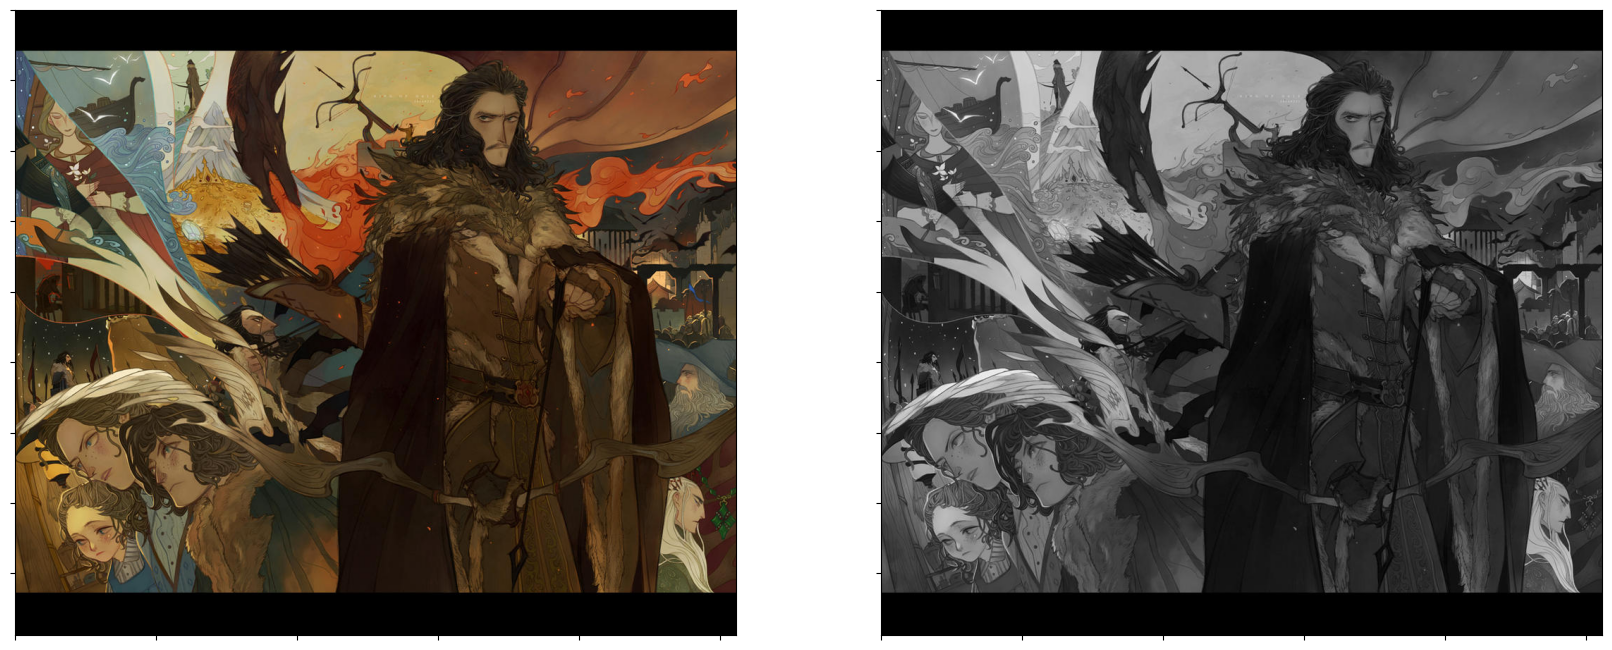

In [4]:
img = cv.imread('../data/wavesheep1.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

height, width = img.shape[:2]
# show_image(cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB))
_, ax = plt.subplots(1, 2, figsize=(width*2/100, height/100))

imgs = [img_rgb, cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)]
for i, ax in enumerate(ax):
    
    show_image(imgs[i], ax=ax)

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

plt.show()

## Simple Thresholding

In simple thresholding, the pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). The function used is `cv2.threshold`. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. See the different types [here](https://docs.opencv.org/4.x/threshold.png).

In [5]:
img_gray

array([[6, 5, 4, ..., 2, 2, 2],
       [4, 3, 2, ..., 1, 1, 1],
       [2, 1, 0, ..., 0, 0, 0],
       ...,
       [2, 1, 0, ..., 0, 0, 0],
       [4, 3, 2, ..., 1, 1, 1],
       [6, 5, 4, ..., 3, 3, 3]], dtype=uint8)

[16:46:26] INFO - Showing image ... (10.24 x 8.88)
[16:46:26] INFO - Showing image ... (10.24 x 8.88)
[16:46:26] INFO - Showing image ... (10.24 x 8.88)
[16:46:27] INFO - Showing image ... (10.24 x 8.88)
[16:46:27] INFO - Showing image ... (10.24 x 8.88)


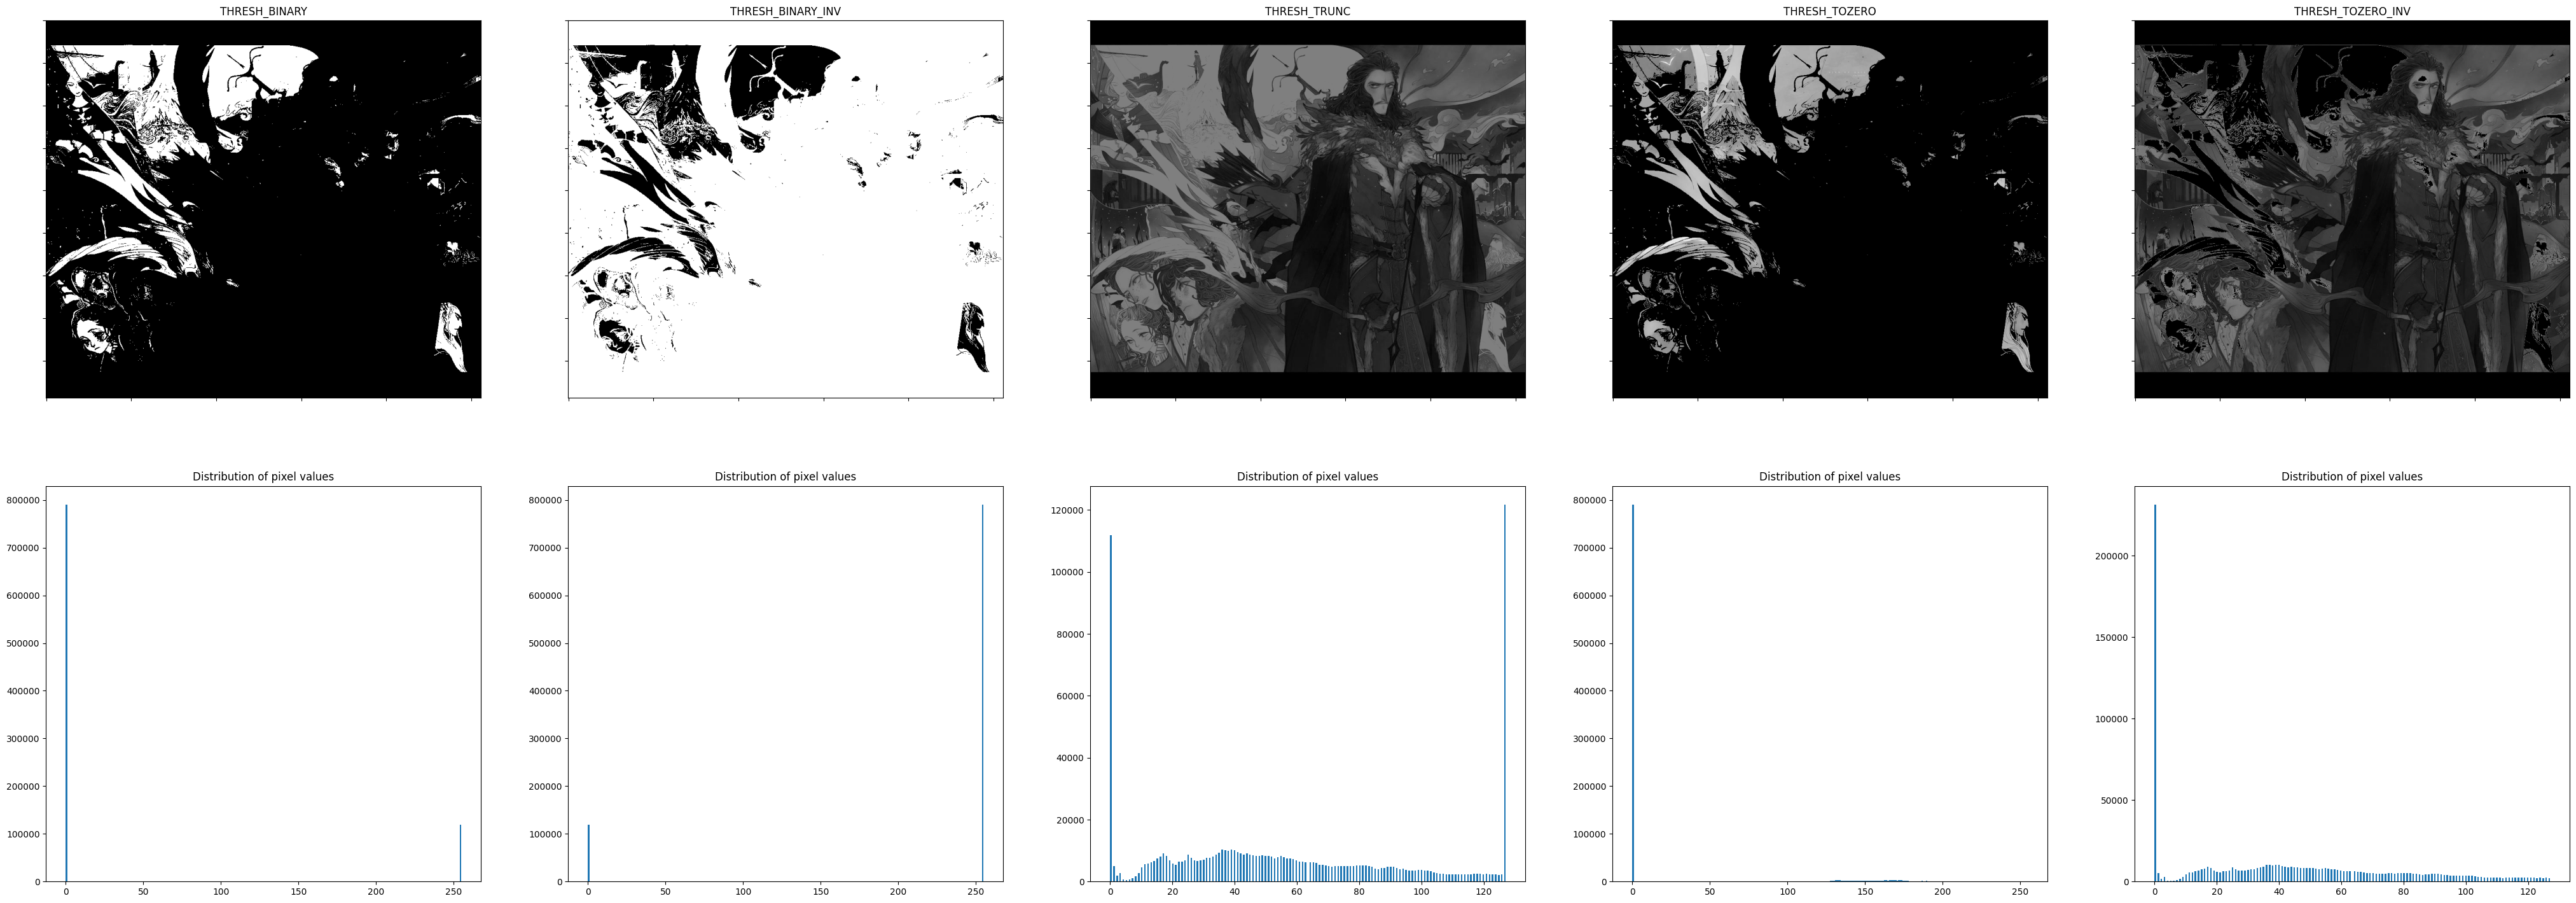

In [75]:
threshold_value = (img_gray.max() - img_gray.min()) / 2
new_value = 255
thresholding_method = [cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_TRUNC, cv.THRESH_TOZERO, cv.THRESH_TOZERO_INV]
thresholding_method_names = ["THRESH_BINARY", "THRESH_BINARY_INV", "THRESH_TRUNC", "THRESH_TOZERO", "THRESH_TOZERO_INV"]
imgs = [
    p[1] for p in [cv.threshold(img_gray, threshold_value, new_value, method) for method in thresholding_method]
]

_, ax = plt.subplots(2, 5, figsize=(width*len(imgs)/100, height*2/100))
for i, im in enumerate(imgs):
    ax_top = ax[0][i]
    show_image(cv.cvtColor(im, cv.COLOR_GRAY2RGB), ax=ax_top)
    ax_top.set_title(thresholding_method_names[i])
    ax_top.xaxis.set_ticklabels([])
    ax_top.yaxis.set_ticklabels([])

    ax_bottom = ax[1][i]
    ax_bottom.set_title("Distribution of pixel values")
    ax_bottom.hist(im.ravel(), bins=256)
plt.show()

|Method|Description|
|-|-|
|`THRESH_BINARY`|Black-out any pixel below threshold, white-out anything above threshold.|
|`THRESH_BINARY_INV`|Black-out any pixel above threshold, white-out anything below threshold.|
|`THRESH_TRUNC`|Limit pixel values to threshold - the effect is the brighter pixels are darken.|
|`THRESH_TOZERO`|Instead of limiting pixel values to threshold, "erase" any pixels below threshold (black-out the darker pixels).|
|`THRESH_TOZERO_INV`|Erase anything above threshold (black-out the brighter pixels).|

## Adaptive Thresholding

[15:25:24] INFO - Showing image ... (1.77 x 1.75)
[15:25:24] INFO - Showing image ... (1.77 x 1.75)


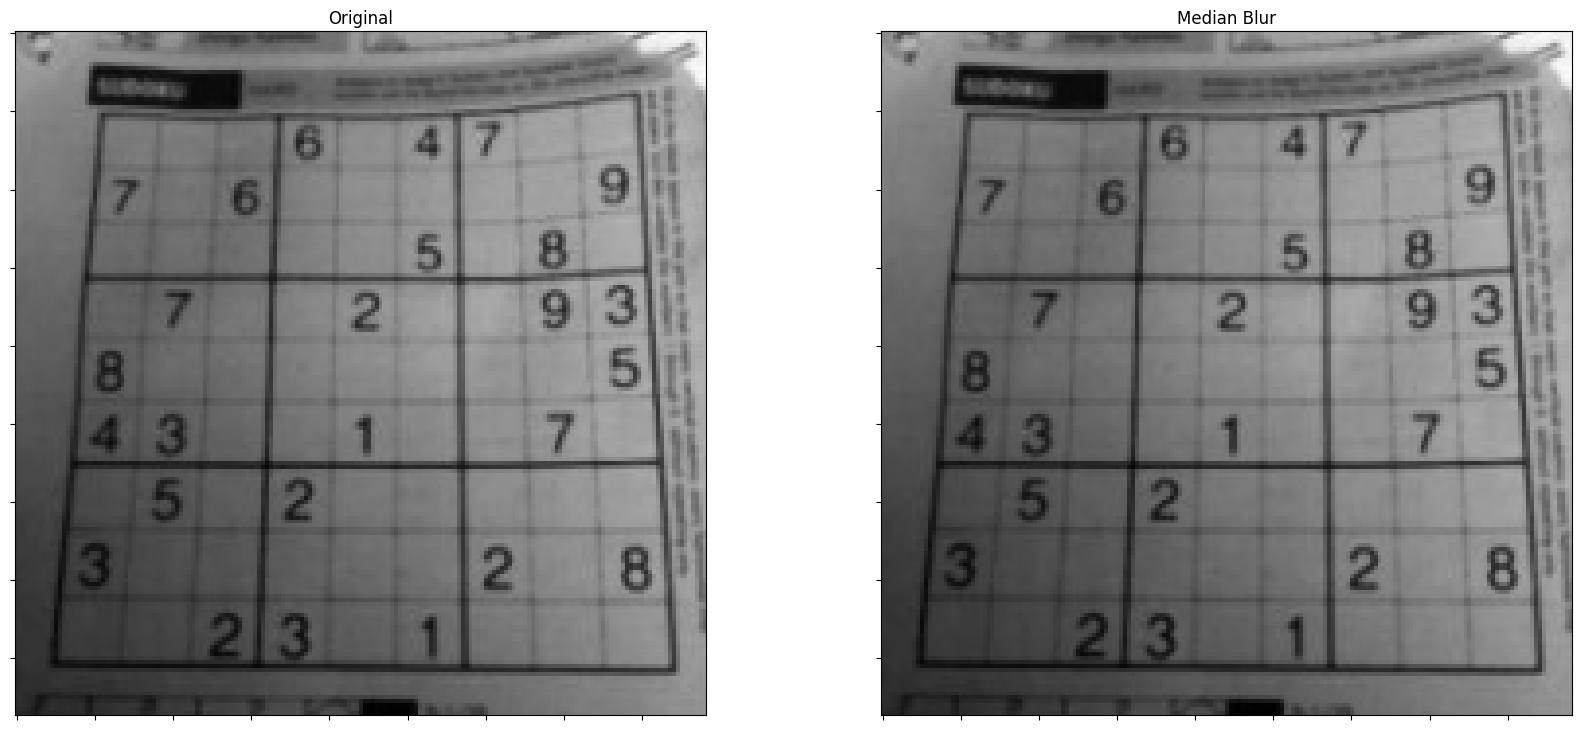

In [43]:
img_sudoku = cv.cvtColor(cv.imread('../data/sudoku.png'), cv.COLOR_BGR2GRAY)
img_blur = img_sudoku # cv.medianBlur(img_sudoku, 5)

titles = ['Original', 'Median Blur']
_, ax = plt.subplots(1, 2, figsize=(width*2/100, height/100))
for i, im in enumerate([img_sudoku, img_blur]):
    show_image(cv.cvtColor(im, cv.COLOR_GRAY2RGB), ax=ax[i])
    ax[i].xaxis.set_ticklabels([])
    ax[i].yaxis.set_ticklabels([])
    ax[i].set_title(titles[i])

plt.savefig('../data/output.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
?cv.adaptiveThreshold

Docstring:
adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
.   @brief Applies an adaptive threshold to an array.
.   
.   The function transforms a grayscale image to a binary image according to the formulae:
.   -   **THRESH_BINARY**
.       \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
.   -   **THRESH_BINARY_INV**
.       \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
.   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
.   
.   The function can process the image in-place.
.   
.   @param src Source 8-bit single-channel image.
.   @param dst Destination image of the same size and the same type as src.
.   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
.   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
.   The #BORDER_REPLICATE

[15:25:43] INFO - Showing image ... (1.77 x 1.75)
[15:25:44] INFO - Showing image ... (1.77 x 1.75)
[15:25:44] INFO - Showing image ... (1.77 x 1.75)
[15:25:44] INFO - Showing image ... (1.77 x 1.75)


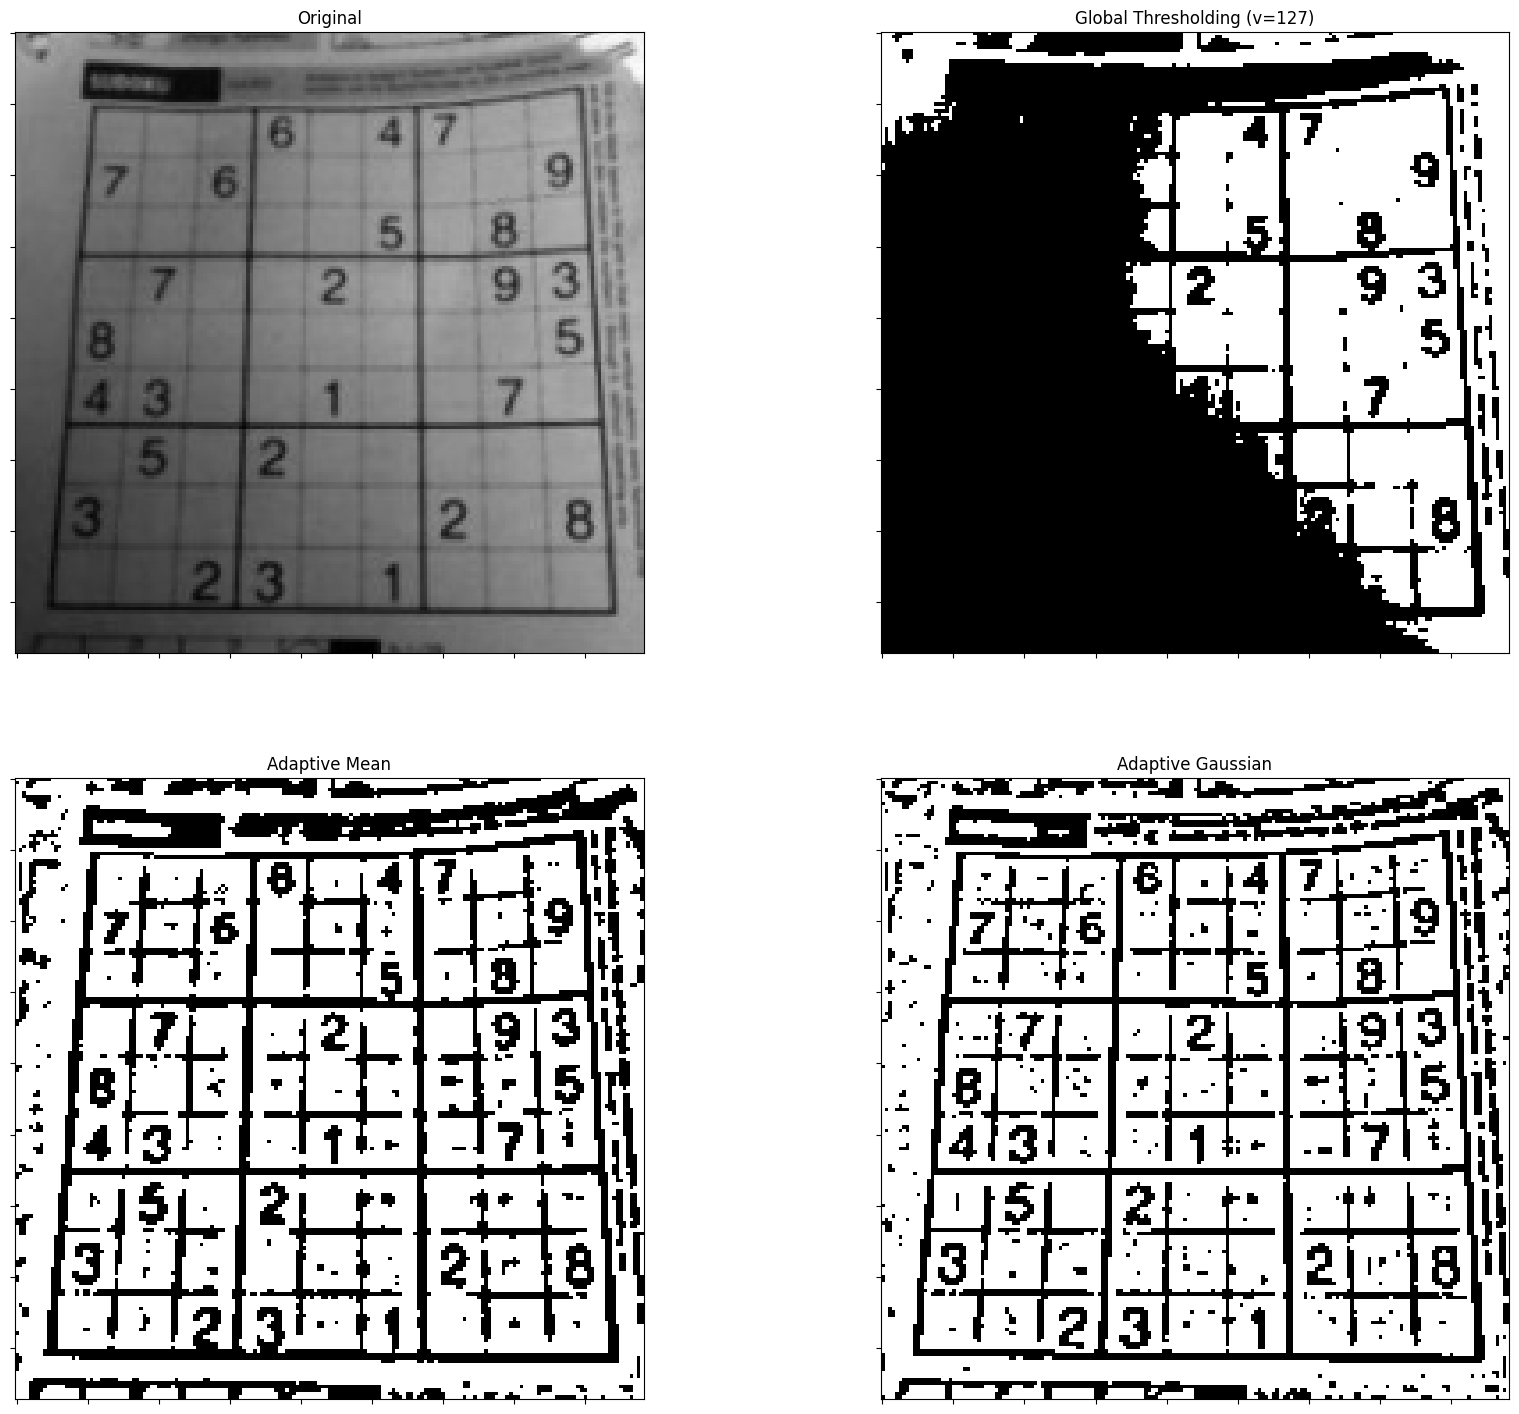

In [44]:
img_in = img_blur
_, im1 = cv.threshold(img_in, threshold_value, new_value, cv.THRESH_BINARY)
imgs = [img_in, im1]
adaptive_methods = [cv.ADAPTIVE_THRESH_MEAN_C, cv.ADAPTIVE_THRESH_GAUSSIAN_C]
imgs += [
    cv.adaptiveThreshold(img_in, 255, method, cv.THRESH_BINARY, 11, 2)
    for method in adaptive_methods
]

titles = ['Original', 'Global Thresholding (v=127)', 'Adaptive Mean', 'Adaptive Gaussian']
_, ax = plt.subplots(2, 2, figsize=(width*2/100, height*2/100))
for i, im in enumerate(imgs):
    ax_ = ax[i//2][i%2]
    show_image(cv.cvtColor(im, cv.COLOR_GRAY2RGB), ax=ax_)
    ax_.set_title(titles[i])
    ax_.xaxis.set_ticklabels([])
    ax_.yaxis.set_ticklabels([])

plt.show()

## Otsu's Binarization

> I generated the noisy image by using [GIMP](https://www.gimp.org/)


[16:20:06] INFO - Showing image ... (5.12 x 4.44)


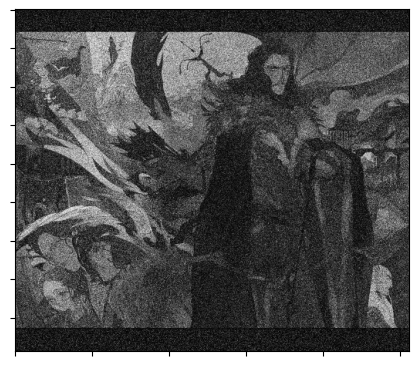

In [53]:
img_noisy = cv.resize(
    cv.imread('../data/wavesheep1-noisy.jpg'), (0, 0),
    fx=0.5, fy=0.5, interpolation=cv.INTER_AREA
)

img_noisy = cv.cvtColor(img_noisy, cv.COLOR_BGR2GRAY)

show_image(cv.cvtColor(img_noisy, cv.COLOR_GRAY2RGB))

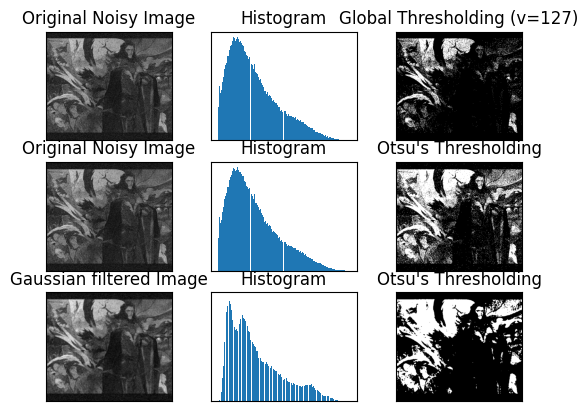

In [55]:
# global thresholding
_, th1 = cv.threshold(img_noisy, 127, 255, cv.THRESH_BINARY)
# Otsu's thresholding
_, th2 = cv.threshold(img_noisy, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img_noisy, (5, 5), 0)
_, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all images and histogram
images = [
    img_noisy, 0, th1,
    img_noisy, 0, th2,
    blur, 0, th3
]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()